# Movie Ratings Sentiment Analysis

The objective of the project is to build a classification model that is able to classify reviews as positive or negative based on their text descriptions. The dataset was obtained from Kaggle: 

In [2]:
import os
import numpy as np
import pandas as pd
import re

## Loading the Data

First, we need to load the data. The data is stored in two separate folders, each of which contains the test and train set.

In [3]:
def load_train_test_imdb_data(data_dir):
    """Loads the IMDB train/test datasets from a folder path.
    Input:
    data_dir: path to the "aclImdb" folder.
    
    Returns:
    train/test datasets as pandas dataframes.
    """

    data = {}
    for split in ["train", "test"]:
        data[split] = []
        for sentiment in ["neg", "pos"]:
            score = 1 if sentiment == "pos" else 0

            path = os.path.join(data_dir, split, sentiment)
            file_names = os.listdir(path)
            for f_name in file_names:
                with open(os.path.join(path, f_name), "r", encoding="utf-8") as f:
                    review = f.read()
                    data[split].append([review, score])

    np.random.shuffle(data["train"])        
    data["train"] = pd.DataFrame(data["train"],
                                 columns=['text', 'sentiment'])

    np.random.shuffle(data["test"])
    data["test"] = pd.DataFrame(data["test"],
                                columns=['text', 'sentiment'])

    return data["train"], data["test"]

In [4]:
train_data, test_data = load_train_test_imdb_data(
    data_dir="aclImdb/")

The length of both the train_data and test_data is the same.

In [5]:
print(len(train_data))
print(len(test_data))

25000
25000


In [6]:
frames = [train_data, test_data]

df = pd.concat(frames, ignore_index = True)

In [7]:
#the two dataframes are now both in one single dataframe. I'll do a 75/25 train test split later
df.shape

(50000, 2)

## Preprocessing

The key steps here are to make everything lowercase, remove extraneous symbols and punctuation from the text.

In [8]:
def preprocess(text):
    # everything to lowercase
    # replacing breaks with spaces
    # remove punctuation
     
    text = text.lower()
    text = text.replace('<br />', '')
    text = re.sub(r'[^\w\s]','', text)

    return  text

In [9]:
df['text'] = df['text'].apply(preprocess)

## Stemming

The objective here is to shorten the word to only include the root word, without any tenses.

In [10]:
from nltk.stem.porter import PorterStemmer
porter = PorterStemmer()

from nltk.tokenize import sent_tokenize, word_tokenize
def stemSentence(sentence):
    token_words=word_tokenize(sentence)
    token_words
    stem_sentence=[]
    for word in token_words:
        stem_sentence.append(porter.stem(word))
        stem_sentence.append(" ")
    return "".join(stem_sentence)

In [11]:
#for the whole dataframe
df['text'] = df['text'].apply(stemSentence)

## Only alphabetic words

At the end of this step we want a list of words for each review, so that this does not include any numbers or other symbols. This is the bag of words.

In [12]:
from nltk import word_tokenize

def is_alpha_tokenize(text):
    words = word_tokenize(text)
    words = ' '.join([word for word in words if word.isalpha()])
    return(words)

In [13]:
df['text'] = df['text'].apply(is_alpha_tokenize)

## Vectorization 

Each word in the bag of words gets an integer which will be used to encode the text in the dataframe.

In [16]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split


#print(df.head())

# Create a series to store the labels: y
y = df['sentiment']

# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(df['text'], y, test_size=0.33, random_state=53)

# Initialize a CountVectorizer object: count_vectorizer
count_vectorizer = CountVectorizer(stop_words='english')

# Transform the training data using only the 'text' column values: count_train 
count_train = count_vectorizer.fit_transform(X_train)

# Transform the test data using only the 'text' column values: count_test 
count_test = count_vectorizer.transform(X_test)

# Print the first 10 features of the count_vectorizer
print(count_vectorizer.get_feature_names()[:12])



#Tfidf Vectorizer

# Initialize a TfidfVectorizer object: tfidf_vectorizer
tfidf_vectorizer = TfidfVectorizer(stop_words='english')

# Transform the training data using only the 'text' column values: count_train 
tfidf_train = tfidf_vectorizer.fit_transform(X_train)

# Transform the test data using only the 'text' column values: count_test 
tfidf_test = tfidf_vectorizer.transform(X_test)

# Print the first 10 features of the count_vectorizer
print(tfidf_vectorizer.get_feature_names()[:12])



['aa', 'aaa', 'aaaaaaaaaaaahhhhhhhhhhhhhh', 'aaaaaaaargh', 'aaaaaaahhhhhhggg', 'aaaaarrrrrrgggggghhhhhh', 'aaaaatchkah', 'aaaahhhhhh', 'aaaand', 'aaaggghhhhhhh', 'aaagh', 'aaah']
['aa', 'aaa', 'aaaaaaaaaaaahhhhhhhhhhhhhh', 'aaaaaaaargh', 'aaaaaaahhhhhhggg', 'aaaaarrrrrrgggggghhhhhh', 'aaaaatchkah', 'aaaahhhhhh', 'aaaand', 'aaaggghhhhhhh', 'aaagh', 'aaah']


In [18]:
# Create the CountVectorizer DataFrame: count_df
count_df = pd.DataFrame(count_train.A, columns=count_vectorizer.get_feature_names())

# Create the TfidfVectorizer DataFrame: tfidf_df
tfidf_df = pd.DataFrame(tfidf_train.A, columns=tfidf_vectorizer.get_feature_names())

# Print the head of count_df
print(count_df.head())

# Print the head of tfidf_df
print(tfidf_df.head())

# Calculate the difference in columns: difference
difference = set(count_df.columns) - set(tfidf_df.columns)
print(difference)

# Check whether the DataFrames are equal
print(count_df.equals(tfidf_df))

   aa  aaa  aaaaaaaaaaaahhhhhhhhhhhhhh  aaaaaaaargh  aaaaaaahhhhhhggg  \
0   0    0                           0            0                 0   
1   0    0                           0            0                 0   
2   0    0                           0            0                 0   
3   0    0                           0            0                 0   
4   0    0                           0            0                 0   

   aaaaarrrrrrgggggghhhhhh  aaaaatchkah  aaaahhhhhh  aaaand  aaaggghhhhhhh  \
0                        0            0           0       0              0   
1                        0            0           0       0              0   
2                        0            0           0       0              0   
3                        0            0           0       0              0   
4                        0            0           0       0              0   

   ...  überwoman  ünel  ünfaith  üvegtigri  üzümcü  ýs  þorleifsson  þór  \
0  ...         

# Exploratory Data Analysis

Three things worth visualizing in this dataset include:
- Barplot of the Target Variable

The objective is to see whether the data is balanced or not. If not balanced, there need to be some steps taken to account for an imbalanced dataset.
- Distribution of the number of words in a review

This step is important to help decide what the dimensions of the input variable should be. When we feed data into the model, all the reviews must be of a fixed size.
- Word cloud of positive and negative reviews

Straightforward visualization technique to see what kind of words are often ocurring in each kind of review.


In [19]:
import seaborn as sns
df.head()

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


,text,sentiment
0,well i just discov that there is a show more d...,1
1,the movi is basic the stori of a russian prost...,0
2,thi is the best movi ive ever seen thoma becke...,1
3,an excel movi and great exampl of how scari a ...,1
4,mr mike wa probabl the most misanthrop comedia...,0


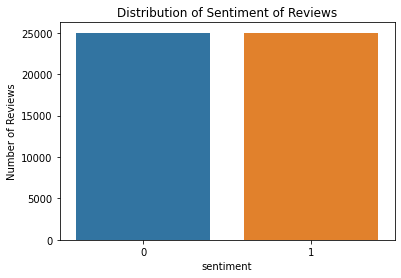

In [20]:
ax = sns.countplot(x = "sentiment", data = df).set(title="Distribution of Sentiment of Reviews", ylabel= "Number of Reviews")

As we can see the dataset is balanced. No techniques for imbalanced datasets are needed.

## Number of Words in a Review

In [21]:
#looking at the distribution of the number of words in a review

from collections import Counter

df['number_of_words'] = df['text'].apply(lambda x: len(x))

In [22]:
df.head()

,text,sentiment,number_of_words
0,well i just discov that there is a show more d...,1,1086
1,the movi is basic the stori of a russian prost...,0,1041
2,thi is the best movi ive ever seen thoma becke...,1,244
3,an excel movi and great exampl of how scari a ...,1,1095
4,mr mike wa probabl the most misanthrop comedia...,0,1009


In [23]:
#!pip install -U seaborn

In [24]:
import seaborn as sns

Text(0, 0.5, 'Number of Reviews')

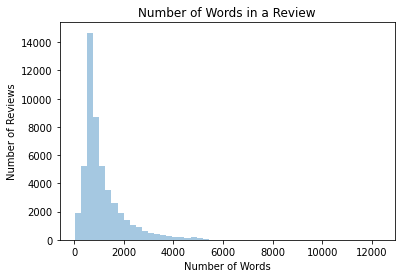

In [31]:
from scipy.stats import norm
ax = sns.distplot(df["number_of_words"], kde = False)
ax.set_title("Number of Words in a Review")
ax.set_xlabel("Number of Words")
ax.set_ylabel("Number of Reviews")

In [32]:
#this seems a little high
df['number_of_words'].mean()

1133.5189

## Make a Word Cloud

In [33]:
#!pip install wordcloud

In [34]:
#all of the words from all of the reviews are included in this string that makes wordcloud
word_cloud_string = df.text.str.cat(sep=' ')

In [36]:
import matplotlib.pyplot as pPlot
from wordcloud import WordCloud, STOPWORDS
import numpy as npy
from PIL import Image
def create_word_cloud(string):
   cloud = WordCloud(background_color = "white", max_words = 200, stopwords = set(STOPWORDS))
   cloud.generate(string)
   cloud.to_file("wordCloud.png")
create_word_cloud(word_cloud_string)

## Save Dataset 

In [ ]:
tfidf_df.to_csv("imdb_tfidf_df.csv")
#count_df.to_csv("imdb_count_df.csv")